In [1]:
import numpy as np
from numpy.random import randint as rnd

### Уровень 0

In [2]:
# а) Диагональная матрица
A = np.array([[3, 0, 0, 0],
             [0, 7, 0, 0],
             [0, 0, 4, 0],
             [0, 0, 0, 1]])

# б) Верхнетреугольная матрица
B = np.array([[rnd(1, 10), rnd(1, 10), rnd(1, 10), rnd(1, 10)],
              [0, rnd(1, 10), rnd(1, 10), rnd(1, 10)],
              [0, 0, rnd(1, 10), rnd(1, 10)],
              [0, 0, 0, rnd(1, 10)]])

# в) Нижнетреугольная матрица
C = np.array([[rnd(1, 10), rnd(1, 10), rnd(1, 10), rnd(1, 10)],
              [0, rnd(1, 10), rnd(1, 10), rnd(1, 10)],
              [0, 0, rnd(1, 10), rnd(1, 10)],
              [0, 0, 0, rnd(1, 10)]]).T

# г) Матрица с единичным определителем

D = np.array([[1, 2, 7],
              [2, 3, 5],
              [2, 3, 4]])



In [3]:
np.linalg.det(D)
# Подобрал с первого раза ^_^

1.0

Найти собственные значения и собственные вектора M:

In [4]:
M = np.array([[2, 2],
[1, 3]])
u, v = np.linalg.eig(M)
print('Собственные значения матрицы m:', u)
print('Собственные вектора матрицы m:', v[0], v[1], sep='\n')

Собственные значения матрицы m: [1. 4.]
Собственные вектора матрицы m:
[-0.89442719 -0.70710678]
[ 0.4472136  -0.70710678]


### Уровень 1

Найти спектральное разложение матрицы M

In [5]:
A = np.array([[1, 2],
[2,3]])

u, v = np.linalg.eig(A)
S = np.array([v[0], v[1]])
D = np.array([[u[0], 0],
             [0, u[1]]])
Result = S @ D @ S.T
Result

array([[1., 2.],
       [2., 3.]])

In [6]:
from sklearn.datasets import load_digits
import pandas as pd

In [7]:
digits = load_digits()
data = pd.DataFrame(digits['data'], columns=digits['feature_names'])

In [8]:
data['target'] = digits['target']

In [9]:
import matplotlib
from matplotlib import pyplot as plt

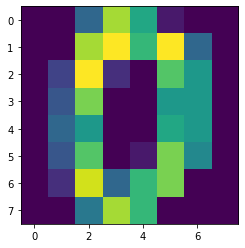

In [10]:
plt.imshow(digits['images'][0])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'], axis=1), data['target'], test_size=0.2)

In [17]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.89      0.87      0.88        39
           2       0.83      0.76      0.79        38
           3       0.70      0.79      0.74        33
           4       0.85      0.89      0.87        37
           5       0.90      0.90      0.90        41
           6       0.87      0.87      0.87        31
           7       0.89      0.97      0.93        32
           8       0.79      0.79      0.79        34
           9       0.89      0.78      0.83        41

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [20]:
model_1 = SVC()
model_1.fit(x_train, y_train)
pred_1 = model_1.predict(x_test)
print(classification_report(pred_1, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.95      0.97        40
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        35
           4       0.95      0.97      0.96        38
           5       1.00      0.95      0.98        43
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        35
           8       0.94      0.91      0.93        35
           9       0.97      1.00      0.99        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Метод опорных векторов отлично предсказывает искомые значения, остановимся на нем 

Теперь пошагово будем понижать количество измерений нашего датасета, и будем отслеживать изменение среднего качество предсказывания

In [21]:
from sklearn.decomposition import PCA

In [44]:
scores = []
for _ in range(64, 1, -1):
    pca = PCA(n_components=_)
    pca.fit(data.drop(['target'], axis=1))

    x_red = pca.transform(data.drop(['target'], axis=1))

    x_train, x_test, y_train, y_test = train_test_split(x_red, data['target'], test_size=0.2)


    model_1.fit(x_train, y_train)
    pred_1 = model_1.predict(x_test)

    scores.append(model_1.score(x_test, y_test))

График зависимости оценки предсказывания от размерности пространства (бонус)

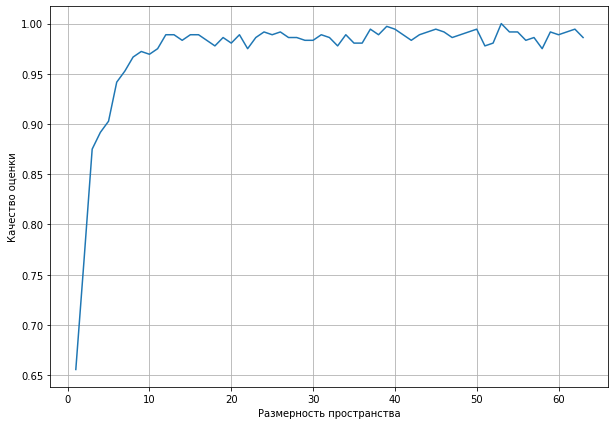

In [56]:
matplotlib.rcParams['figure.figsize'] = [10, 7]
x = np.linspace(63, 1, 63)
plt.plot(x, scores)
plt.ylabel('Качество оценки')
plt.xlabel('Размерность пространства')
plt.
plt.grid()
plt.show()

И, собственно, сама задача, оценим качество восстановления нашей матрицы:

In [54]:
scores_tr = []
for _ in range(64, 1, -1):
    pca = PCA(n_components=_)
    pca.fit(data.drop(['target'], axis=1))

    x_red = pca.transform(data.drop(['target'], axis=1))
    
    x_tr = pca.inverse_transform(x_red)
    
    x_train, x_test, y_train, y_test = train_test_split(x_tr, data['target'], test_size=0.2)


    model_1.fit(x_train, y_train)
    pred_1 = model_1.predict(x_test)

    scores_tr.append(model_1.score(x_test, y_test))

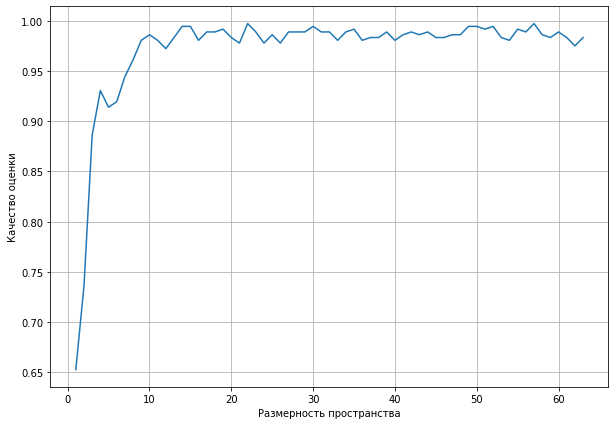

In [57]:
x = np.linspace(63, 1, 63)
plt.plot(x, scores_tr)
plt.ylabel('Качество оценки')
plt.xlabel('Размерность пространства')
plt.grid()
plt.show()

Как мы можем видеть, работая с размерностью меньше 10 невозможно получить качественный результат, при чем процесс восстановления  
создает дополнительные искажения, модель после восстановленная из размерностей 10 и ниже до исходной работает хуже чем  
модель только из 10 признаков и ниже